In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load data

In [5]:
# First, old solver
data = pd.read_csv('Solver verification experiment.csv')
other_data = pd.read_csv('Solver verification experiment_other-data.csv')

# Can't remember what the 2nd run was for (perhaps fixed a bug in algorithm after very first run?)

# 3rd run - Patched solver num-mines constraint bug (should have higher win rates (~2-5%) across all difficulties)
data3 = pd.read_csv('Solver verification experiment(2).csv')
other_data3 = pd.read_csv('Solver verification experiment_other-data(2).csv')

# 3rd run has higher number of rows because batch size was 5 games, and 100k games total played per difficulty.
# 1st run had batch size of 50 games with 50k games per difficulty.
print(f"Main data shape: {data.shape}")
print(f"3rd run main data shape: {data3.shape}")
data

Main data shape: (3000, 11)
3rd run main data shape: (60000, 12)


,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,difficulty,sample_size,use_num_mines_constraint,first_click_pos,first_click_is_zero,parameters_id
0,48,46,1.999817,159,155,Beginner (9x9),11x11,True,"(3, 3)",True,1
1,48,48,2.109485,162,160,Beginner (9x9),11x11,True,"(3, 3)",True,1
2,47,46,2.234476,168,163,Beginner (9x9),11x11,True,"(3, 3)",True,1
3,49,45,2.265723,155,149,Beginner (9x9),11x11,True,"(3, 3)",True,1
4,47,44,2.468828,163,156,Beginner (9x9),11x11,True,"(3, 3)",True,1
...,...,...,...,...,...,...,...,...,...,...,...
2995,20,10,163.152982,1044,943,Expert (16x30),18x32,True,"(3, 3)",True,3
2996,16,7,159.528422,973,861,Expert (16x30),18x32,True,"(3, 3)",True,3
2997,13,5,141.780470,880,758,Expert (16x30),18x32,True,"(3, 3)",True,3
2998,23,5,140.686831,1003,884,Expert (16x30),18x32,True,"(3, 3)",True,3


In [6]:
data3

,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,difficulty,sample_size,use_num_mines_constraint,first_click_pos,first_click_is_zero,parameters_id,task_id
0,4,4,0.234354,18,16,Beginner (9x9),11x11,True,"(3, 3)",True,1,1
1,5,5,0.268111,13,13,Beginner (9x9),11x11,True,"(3, 3)",True,1,4
2,4,3,0.252274,16,14,Beginner (9x9),11x11,True,"(3, 3)",True,1,7
3,5,5,0.377073,18,18,Beginner (9x9),11x11,True,"(3, 3)",True,1,10
4,5,5,0.218324,17,17,Beginner (9x9),11x11,True,"(3, 3)",True,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,4,3,15.357859,111,106,Expert (16x30),18x32,True,"(3, 3)",True,3,59994
59996,3,1,13.514315,100,94,Expert (16x30),18x32,True,"(3, 3)",True,3,59997
59997,2,1,17.795141,95,73,Expert (16x30),18x32,True,"(3, 3)",True,3,59991
59998,3,1,21.216683,120,107,Expert (16x30),18x32,True,"(3, 3)",True,3,59985


In [9]:
print(f"Other data shape: {other_data.shape}")
other_data

Other data shape: (1, 8)


,sample_size,use_num_mines_constraint,first_click_pos,num_games,verbose,visualise,agent_seed,run_seed
0,NaN,True,"(3, 3)",50000,False,False,20,2020


In [8]:
print(f"Other data (3rd run) shape: {other_data3.shape}")
other_data3

Other data (3rd run) shape: (1, 10)


,sample_size,use_num_mines_constraint,first_click_pos,num_games,verbose,visualise,agent_seed,run_seed,batch_size,num_processes
0,NaN,True,"(3, 3)",100000,False,False,20,2020,5,12


# Analyse

In [9]:
def prepare_data_sum(data, other_data):
    # Group by parameters combo and sum up columns of interest
    data_sum = data.groupby(['parameters_id'], as_index=False).agg({
        'difficulty': 'first',
        'wins': 'sum',
        'wins_without_guess' : 'sum',
        'time_elapsed' : 'sum',
        'samples_considered' : 'sum',
        'samples_with_solutions' : 'sum',
        })

    # Remove id column as the difficulty it represents is enough info and has already been included
    data_sum = data_sum.drop('parameters_id', axis=1)
    
    # Calculate win rates and insert into new columns
    num_games = other_data['num_games'][0]
    data_sum['win rate (%)'] = data_sum['wins'] / num_games * 100
    data_sum['win rate without guess (%)'] = data_sum['wins_without_guess'] / num_games * 100
    
    return data_sum

In [21]:
data1_sum = prepare_data_sum(data, other_data)
data3_sum = prepare_data_sum(data3, other_data3)

data1_sum['version'] = "1"
data3_sum['version'] = "3"

data_sum = pd.concat([data1_sum, data3_sum])

data_sum

,difficulty,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,win rate (%),win rate without guess (%),version
0,Beginner (9x9),48089,45408,2309.099058,166122,161109,96.178,90.816,1
1,Intermediate (16x16),42548,35182,25274.535951,436897,415474,85.096,70.364,1
2,Expert (16x30),18089,7283,176205.496699,965135,859161,36.178,14.566,1
0,Beginner (9x9),96290,91747,4923.256687,288172,279089,96.290,91.747,3
1,Intermediate (16x16),85731,72383,59668.480631,834195,795351,85.731,72.383,3
2,Expert (16x30),36825,16024,408059.015318,1910586,1708786,36.825,16.024,3


In [22]:
# Add expected win rates that are from the two solvers made by others

#~92% Beginner ~72% Intermediate ~16% Expert
data_sum = data_sum.append([
    {'difficulty': 'Beginner (9x9)', 'version' : "Expected (other solvers)", 'win rate without guess (%)' : 92},
    {'difficulty': 'Intermediate (16x16)', 'version' : "Expected (other solvers)", 'win rate without guess (%)' : 72},
    {'difficulty': 'Expert (16x30)', 'version' : "Expected (other solvers)", 'win rate without guess (%)' : 16}
], ignore_index=True)

In [23]:
data_sum

,difficulty,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,win rate (%),win rate without guess (%),version
0,Beginner (9x9),48089.0,45408.0,2309.099058,166122.0,161109.0,96.178,90.816,1
1,Intermediate (16x16),42548.0,35182.0,25274.535951,436897.0,415474.0,85.096,70.364,1
2,Expert (16x30),18089.0,7283.0,176205.496699,965135.0,859161.0,36.178,14.566,1
3,Beginner (9x9),96290.0,91747.0,4923.256687,288172.0,279089.0,96.290,91.747,3
4,Intermediate (16x16),85731.0,72383.0,59668.480631,834195.0,795351.0,85.731,72.383,3
5,Expert (16x30),36825.0,16024.0,408059.015318,1910586.0,1708786.0,36.825,16.024,3
6,Beginner (9x9),NaN,NaN,NaN,NaN,NaN,NaN,92.000,Expected (other solvers)
7,Intermediate (16x16),NaN,NaN,NaN,NaN,NaN,NaN,72.000,Expected (other solvers)
8,Expert (16x30),NaN,NaN,NaN,NaN,NaN,NaN,16.000,Expected (other solvers)


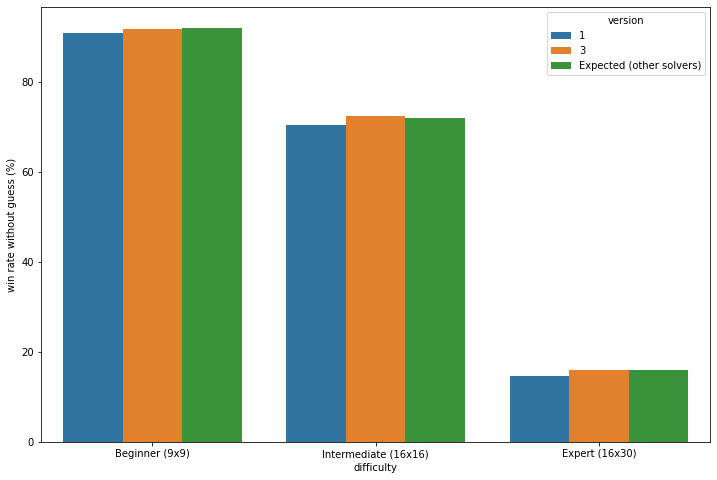

In [24]:
sns.barplot(x='difficulty', y='win rate without guess (%)', hue='version', data=data_sum)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

In [36]:
# Print difference from expected win rates (actual - expected) for each difficulty
# (this uses win rates from latest version of solver)
current = data_sum[data_sum['version'] == "3"]
external = data_sum[data_sum['version'] == "Expected (other solvers)"]

for i in range(len(current.index)):
    # Get rows for the difficulty
    row = current.iloc[i]
    matching_external_row = external[external['difficulty'] == row.difficulty].iloc[0]
    
    # Calcualte difference 2d.p.
    win_rate_diff = row['win rate without guess (%)'] - matching_external_row['win rate without guess (%)']
    win_rate_diff = round(win_rate_diff, 2)
    
    # Put a + sign on positive rates
    if win_rate_diff > 0:
        win_rate_diff = "+" + str(win_rate_diff)
        
    print(f"{row.difficulty}:  \t{win_rate_diff}%")

Beginner (9x9):  	-0.25%
Intermediate (16x16):  	+0.38%
Expert (16x30):  	+0.02%


In [37]:
def prepare_cumulative_sums(data, batch_size):
    # Get cumulative sum for wins
    data_cum_sums = pd.DataFrame(data.groupby('difficulty')[['wins', 'wins_without_guess']].cumsum())

    # Append column showing how many cumulatives games have been played for each row
    data_cum_sums['num_games'] = batch_size * (data.groupby('difficulty').cumcount() + 1)

    # Append difficulty column
    data_cum_sums['difficulty'] = data['difficulty']
    
    # Calculate win rates (based on cumulative wins and games played) and insert into new columns
    data_cum_sums['win rate (%)'] = round(data_cum_sums['wins'] / data_cum_sums['num_games'] * 100, 2)
    data_cum_sums['win rate without guess (%)'] = round(data_cum_sums['wins_without_guess'] / data_cum_sums['num_games'] * 100, 2)
    
    return data_cum_sums

In [39]:
data_cum_sums = prepare_cumulative_sums(data, 50)
data3_cum_sums = prepare_cumulative_sums(data3, 5)

data_cum_sums

,wins,wins_without_guess,num_games,difficulty,win rate (%),win rate without guess (%)
0,48,46,50,Beginner (9x9),96.00,92.00
1,96,94,100,Beginner (9x9),96.00,94.00
2,143,140,150,Beginner (9x9),95.33,93.33
3,192,185,200,Beginner (9x9),96.00,92.50
4,239,229,250,Beginner (9x9),95.60,91.60
...,...,...,...,...,...,...
2995,18015,7254,49800,Expert (16x30),36.17,14.57
2996,18031,7261,49850,Expert (16x30),36.17,14.57
2997,18044,7266,49900,Expert (16x30),36.16,14.56
2998,18067,7271,49950,Expert (16x30),36.17,14.56


In [40]:
data3_cum_sums

,wins,wins_without_guess,num_games,difficulty,win rate (%),win rate without guess (%)
0,4,4,5,Beginner (9x9),80.00,80.00
1,9,9,10,Beginner (9x9),90.00,90.00
2,13,12,15,Beginner (9x9),86.67,80.00
3,18,17,20,Beginner (9x9),90.00,85.00
4,23,22,25,Beginner (9x9),92.00,88.00
...,...,...,...,...,...,...
59995,36816,16020,99980,Expert (16x30),36.82,16.02
59996,36819,16021,99985,Expert (16x30),36.82,16.02
59997,36821,16022,99990,Expert (16x30),36.82,16.02
59998,36824,16023,99995,Expert (16x30),36.83,16.02


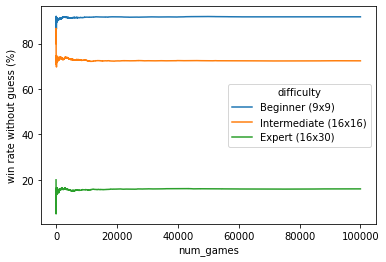

In [49]:
sns.lineplot(x='num_games', y='win rate without guess (%)', hue='difficulty', data=data3_cum_sums)
plt.show()

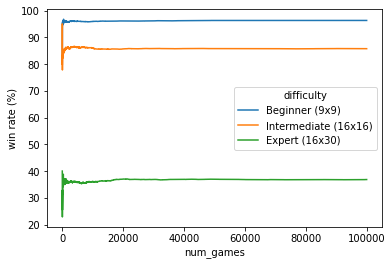

In [51]:
sns.lineplot(x='num_games', y='win rate (%)', hue='difficulty', data=data3_cum_sums)
plt.show()

In [53]:
# Get converging mean-adjusted win rates for each difficulty

cols = ['win rate (%)', 'win rate without guess (%)']
ys = []

for difficulty in ('Beginner (9x9)', 'Intermediate (16x16)', 'Expert (16x30)'):
    df_diff = data3_cum_sums[data3_cum_sums.difficulty == difficulty]
    x = df_diff[cols].iloc[-1]
    y = df_diff[cols] - x
    y['num_games'] = df_diff['num_games']
    ys.append(y)
    
ys[0]

,win rate (%),win rate without guess (%),num_games
0,-16.29,-11.75,5
1,-6.29,-1.75,10
2,-9.62,-11.75,15
3,-6.29,-6.75,20
4,-4.29,-3.75,25
...,...,...,...
59974,0.00,0.00,99980
59977,0.00,0.00,99985
59980,0.00,0.00,99990
59984,0.00,0.00,99995


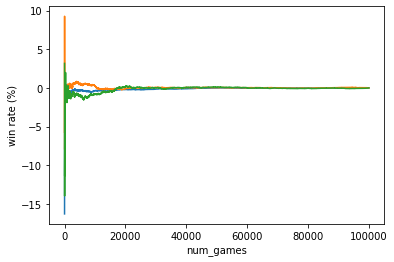

In [59]:
for difficulty_convergence in ys:
    sns.lineplot(x='num_games', y='win rate (%)', data=difficulty_convergence)

plt.show()

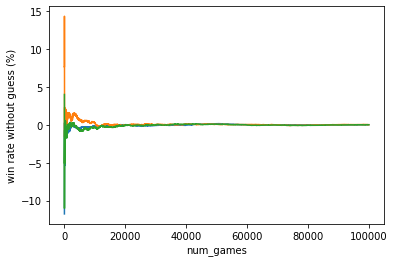

In [61]:
for difficulty_convergence in ys:
    sns.lineplot(x='num_games', y='win rate without guess (%)', data=difficulty_convergence)

plt.show()

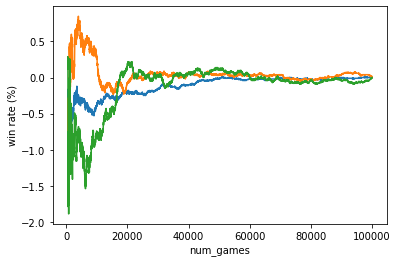

In [124]:
for difficulty_convergence in ys:
    sns.lineplot(x='num_games', y='win rate (%)', data=difficulty_convergence[100:])

plt.show()

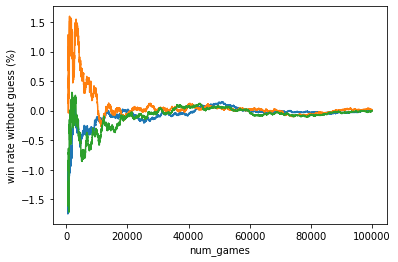

In [123]:
for difficulty_convergence in ys:
    sns.lineplot(x='num_games', y='win rate without guess (%)', data=difficulty_convergence[100:])

plt.show()

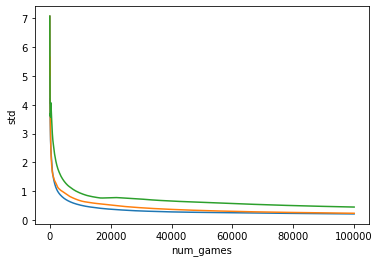

In [115]:
for difficulty_convergence in ys:
    difficulty_convergence['std'] = difficulty_convergence['win rate (%)'].expanding(1).std()
    sns.lineplot(x='num_games', y='std', data=difficulty_convergence)

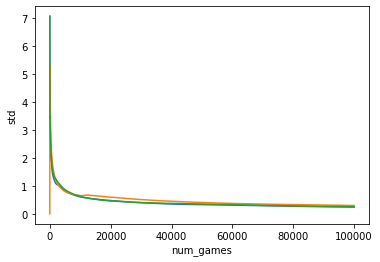

In [116]:
for difficulty_convergence in ys:
    difficulty_convergence['std'] = difficulty_convergence['win rate without guess (%)'].expanding(1).std()
    sns.lineplot(x='num_games', y='std', data=difficulty_convergence)

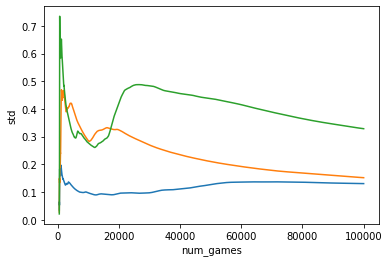

In [122]:
for difficulty_convergence in ys:
    difficulty_convergence['std'] = difficulty_convergence[100:]['win rate (%)'].expanding(1).std()
    sns.lineplot(x='num_games', y='std', data=difficulty_convergence)

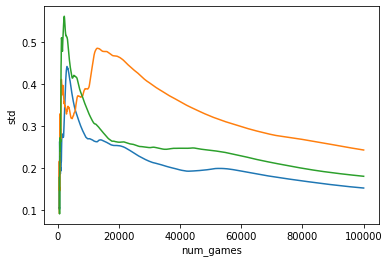

In [121]:
for difficulty_convergence in ys:
    difficulty_convergence['std'] = difficulty_convergence[100:]['win rate without guess (%)'].expanding(1).std()
    sns.lineplot(x='num_games', y='std', data=difficulty_convergence)

<AxesSubplot:xlabel='num_games', ylabel='rate (%)'>

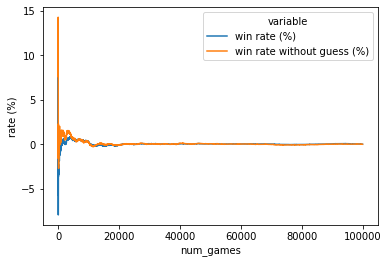

In [114]:
# Dataframe melt() method test

# for difficulty_convergence in ys[1:2]:
expanding_std = difficulty_convergence.expanding(1).std()

difficulty_convergence['std'] = difficulty_convergence['win rate (%)'].expanding(1).std()

df = difficulty_convergence.melt('num_games', value_vars=['win rate (%)', 'win rate without guess (%)'],
                                value_name='rate (%)')
sns.lineplot(x='num_games', y='rate (%)', hue='variable', data=df)
# df